# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; David Selemba


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


The Animal_Agent class defines the agent in the model, which is some kind of animal that can interact with other agents and the environment. There are two types of these animals, predators and prey, and they have a number of different charcteristics, of which some are shared. Some of the most important characteristics are that predators can hunt the prey animals and that the prey animals can procreate together based on environmental characteristics based on that class. This is how the model will evolve and change as new animal agents are added through reproduction or removed by predators and old age. The Environment class sets the domain for the agent based model to occur, as the animals are added to the space and their random walks and actions are simulated. The class has both a simulate and simulate_plot_populations functions, in which one carries out the simulation in general, while the other observes how each fur color for mice adjusts as the simulation moves on and a different number of animals are in the environment. By creating mice agent objects using the Animal_Agent class and then adding them to an Environment object, we can then simulate the natural selection process using the plot populations simulation to identify how different colored mice blend into their ecosystem over time. 

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

In [1]:
#Write your code here
from Environment import Environment
from Animal_Agent_Class import Animal_Agent

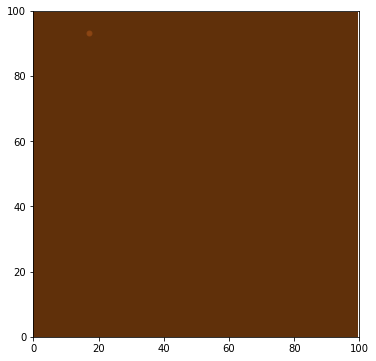

In [2]:
new_environment = Environment()
new_agent = Animal_Agent(sex = "F")
new_environment.add_agent(new_agent)
new_environment.simulate(tot_time = 1)

In the Environment class, the simulate function was using an incorrect order for the agent.procreate function that was created in the Animal_Agent class. The procreate function takes in a list of the animal agents and then the current time step, but it had them set backwards so the function was attempting to subtract the last litter time from the list of agents rather than the time step. An error was called because you cannot subtract an integer from a list in Python. However, the bug is fixed by changing the code to agent.procreate(self.animal_agents, dt) and restarting the kernal to update the classes.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


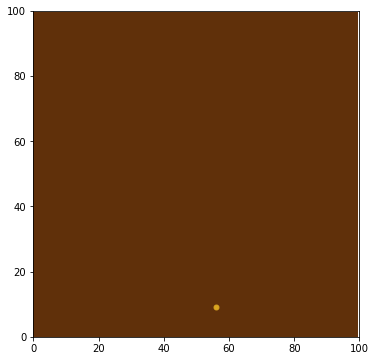

In [3]:
#Write your code here
new_environment = Environment()
new_agent = Animal_Agent(sex = "F")
new_agent.set_allele(alle_d = 1, alle_m = 1)
new_environment.add_agent(new_agent)
new_environment.simulate(tot_time = 10)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

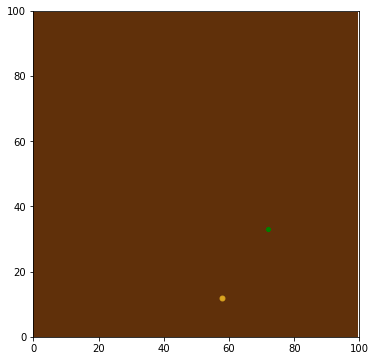

In [4]:
#Write your code here
new_predator = Animal_Agent(ptype = 'Predator', shape = "P", color = "green")
new_environment.add_agent(new_predator)
new_environment.simulate(tot_time = 10)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

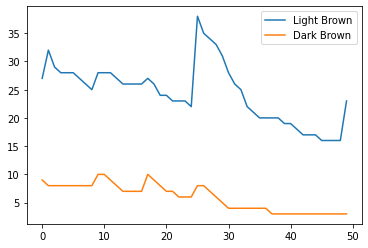

31


In [17]:
#Write your code here
import random
env2 = Environment()
for i in range(20):
    prey = Animal_Agent(sex = "M")
    prey.set_allele(alle_d = random.randint(0,1), alle_m = random.randint(0,1))
    prey2 = Animal_Agent(sex = "F")
    prey2.set_allele(alle_d = random.randint(0,1), alle_m = random.randint(0,1))
    env2.add_agent(prey)
    env2.add_agent(prey2)

for i in range(5):
    predator = Animal_Agent(ptype = 'Predator', shape = "P", color = "green")
    env2.add_agent(predator)


env2.simulate_plot_populations(50)
print(len(env2.animal_agents))

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The population is seemingly periodic over time, as there are periods where the population will spike followed by small levels of activity for a while. This could be due to gestation time for the mice, as the booms occur when they are again able to procreate. The spikes may also be due to a number of mice born at the same time dying of old age when they turn 50, whereas the other small shifts are more likely to be due to predators killing them. 

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [13]:
#Write your code here
class Mouse(Animal_Agent):
    
    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        super().__init__(xmax,ymax,ptype,sex,age_limit,catch_radius,mate_range,gestation,shape,color,saturation_pop)
        
    def set_allele(self, alle_d, alle_m):
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
            
        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05
            
    def procreate(self,all_agents,time):
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Mouse(sex="F")
                        if np.random.randint(0,2) == 1:
                            child = Mouse(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [14]:
#Write your code here
class Hawk(Animal_Agent):
    
    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        super().__init__(xmax,ymax,ptype,sex,age_limit,catch_radius,mate_range,gestation,shape,color,saturation_pop)
        
    def hunt(self,all_agents):
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius and agent.catch_probability <= random.random():
                    agent.is_caught = True
                    return agent       
        return False
        
        


### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

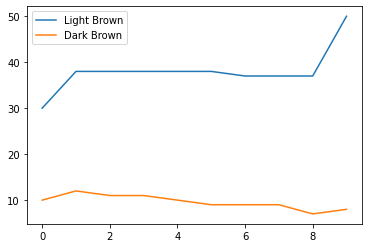

63


In [27]:
#Write your code here
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
mouse_env = Environment()
for i in range(20):
    prey = Mouse(sex = "M")
    prey.set_allele(alle_d = random.randint(0,1), alle_m = random.randint(0,1))
    prey2 = Mouse(sex = "F")
    prey2.set_allele(alle_d = random.randint(0,1), alle_m = random.randint(0,1))
    mouse_env.add_agent(prey)
    mouse_env.add_agent(prey2)

for i in range(5):
    hawk = Hawk(ptype = 'Predator', shape = "P", color = "green")
    mouse_env.add_agent(hawk)


mouse_env.simulate_plot_populations(10)
print(len(mouse_env.animal_agents))

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

The hawk and mouse classes resulted in fewer of the mice with the recessive genes surviving because of their higher catch probability, whereas it tended to be more even in the original model. This is similar to natural selection as genes that favor them in their environment, such as the ability to be avoid being caught, allow them to procreate further and pass these genes on to survive.

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.